# Lab 2

## Prep

To find the inductance, I first found Lcrit as such

$Lcrit = (1-M) * R * (Ts/2)$

Then, using the equation $D_{dcm} = \sqrt{\alpha} * D_{ccm}$, I calculated $\alpha = 0.62$, which when multiplied by Lcrit gives $L = 18.38 \mu H$

Plugging in the resultant alpha into the Ipk equation

$$I_{pk} = (V/R) * (2/\sqrt{\alpha})$$

yields $I_{pk} = 3.8095 A$




### Output Voltage at 50% duty cycle

Rewrote the equation for duty cycle in DCM as a polynomial and solved using MATLAB. In this case, $K = \frac{2}{T_s} \frac{L}{R}$

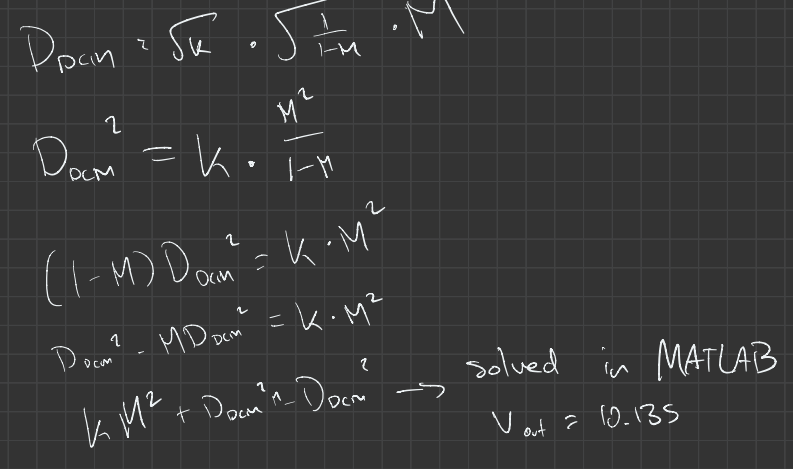

### Q1
The equation given in the datasheet is $f_{osc} = \frac{1.72}{R_{rt}*C_{ct}} = \frac{1.72}{7.87k\Omega*{2.2nF}} = 99341.57$

where $R_{rt}$ and $C_{ct}$ are the timing resistor and capacitor. However our particular UC2844 chip has the output frequency as half of $f_{osc}$, to that would place it at about 49671 Hz. Note that this output only holds for up to a 50% duty cycle.

### Q2

This holds up reasonably well with the sim results, with each period taking up just slightly over 2e-5 (or 1/50000) seconds, which lines up with a switching frequency of slightly under 50 kHz.

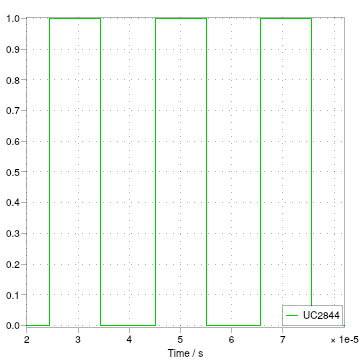

### Q3

The duty cycle is 50% here, and that is because we have tied the current sense pin to ground. Therefore, the internal comparator will never trigger, and the flip-flop will never be reset until the 2844's internal 50% duty cycle limiter kicks in and forces the output down.

### Q4

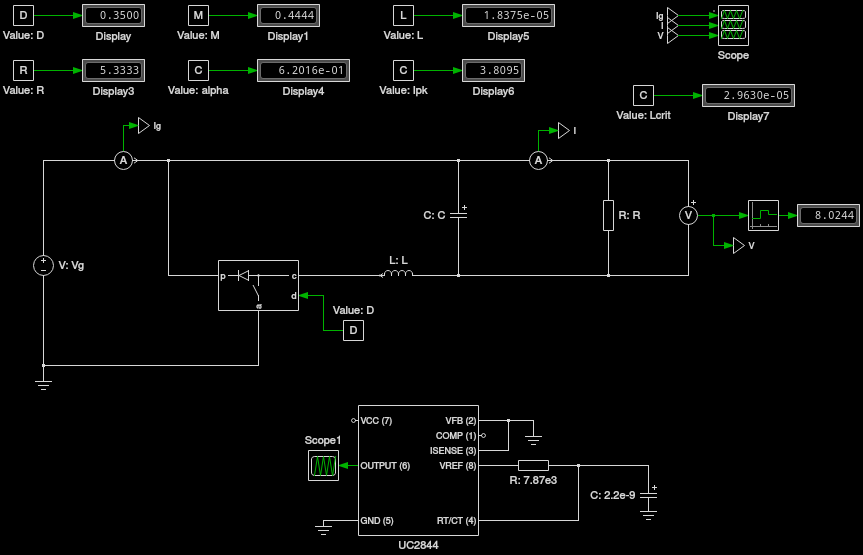

```matlab
fs = 49671;
Ts=1/fs;

C=60e-6;
D=0.35;

Vg=18;
V=8;
M=V/Vg;
P=12;

R=V^2/P;

Lcrit = (1-M) * R * (Ts/2);

if (M > D) % DCM
	alpha = (D / M) ^ 2;
	Ipk = (V/R) * (2/sqrt(alpha));
else % CCM
	alpha = 1; % or anything above it
	Ipk = (V/R) * (1 + 1/alpha)
endif

L = alpha * Lcrit;

K = (2/Ts) * (L/R);
Vcalc = (roots([K, D^2, -(D^2)]) * Vg)(2)

Ipk = (V/R) * (2/sqrt(alpha));
```

### Q5

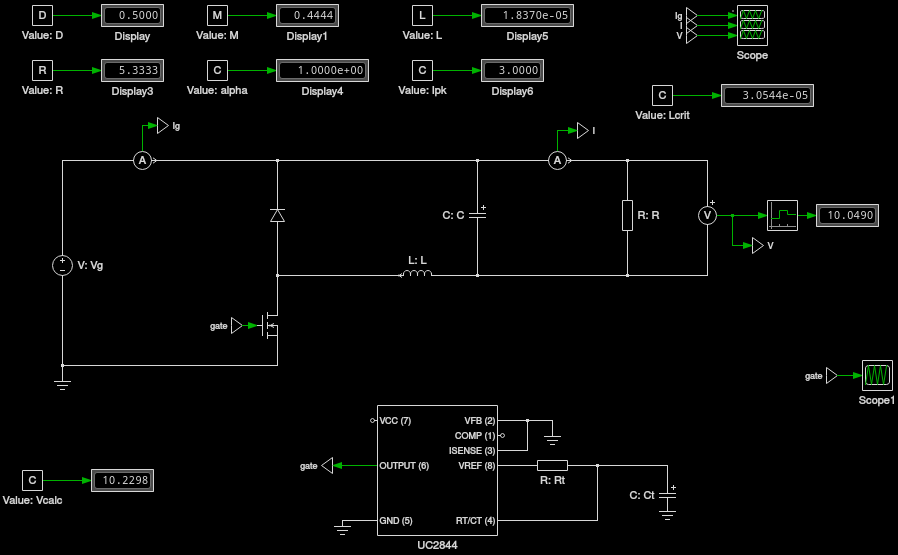

The calculated Vout value is a reasonably close match to the the simulated output, with the calculated value being higher by about 180 mV. This is because the duty cycle output is not exactly 50% but closer to 48.3% duty cycle.

### Q6

| Vcomp | Ipk  |
|-------|------|
| 1.5   | 1.33 |
| 1.6   | 2    |
| 1.7   | 2.67 |
| 1.8   | 3.33 |

Text(0, 0.5, 'Ipk (A)')

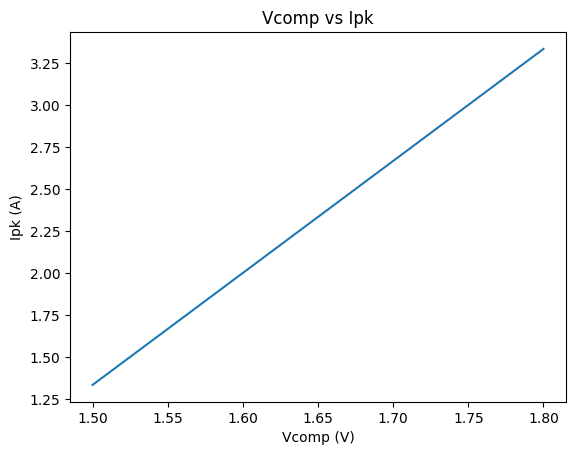

In [4]:
import matplotlib.pyplot as plt

vcomp = [1.5, 1.6, 1.7, 1.8]
ipk = [4/3, 6/3, 8/3, 10/3]
plt.plot(vcomp, ipk)
plt.title("Vcomp vs Ipk")
plt.xlabel("Vcomp (V)")
plt.ylabel("Ipk (A)")

### Q7

The relation between Vcomp and Ipk can be represented by the equation $I_{pk} = V_{comp} * \frac{20}{3} - \frac{26}{3}$

Ipk represents the value where the SR latch clears from the Isense voltage matches the COMP voltage, so the Ipk value is equal to the current through the shunt at the Isense voltage. The COMP voltage enters the chip, and then is reduced somewhat by dropping over two diodes, and then is further divided by 3 by the resistor divider.

### Q8

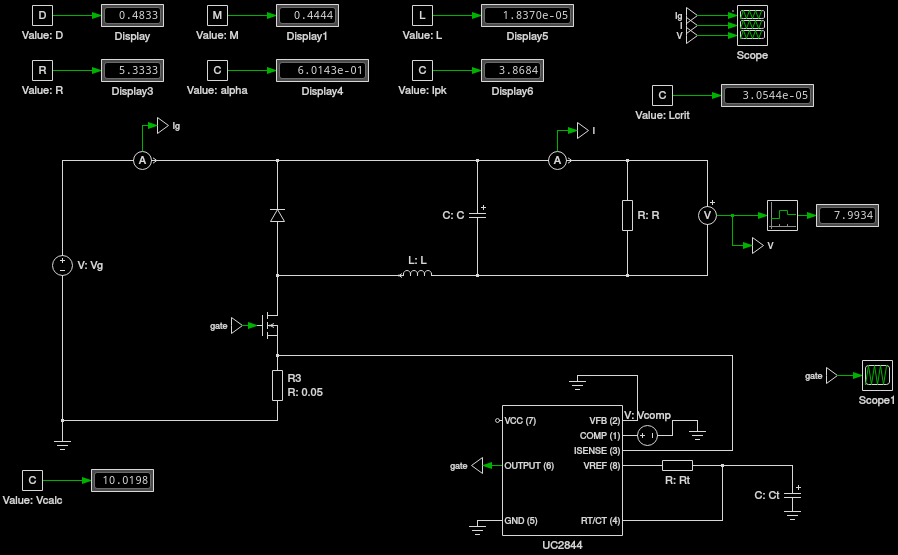
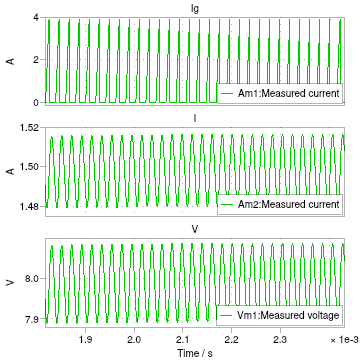
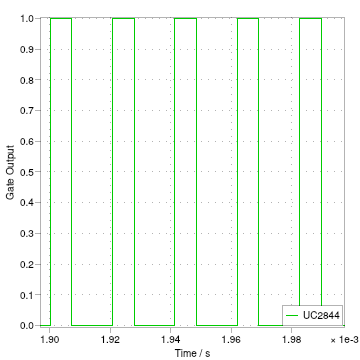

As seen in these plots, the output voltage matches the expected 8V, the peak current matches the calculated ~3.86, and the duty cycle matches the expected ~35% 

### Q9

Source current: The current ramps up as the switch is connected and the inductor charges, and current ceases to flow when the switch is disconnected. Additionally, the fact that the input current starts at 0 each cycle indicates that the conductor operates in DCM.

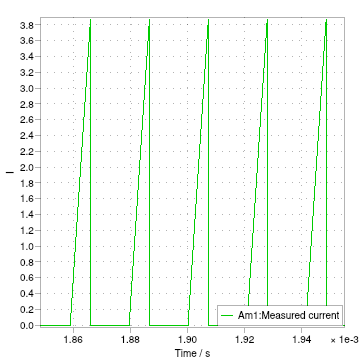

Shunt Voltage: This graph follows the same shape as the source current and indicates the same properties, with the difference being that it's proportional to the source current by a factor of the shunt resistance.

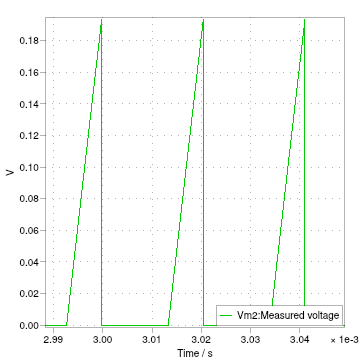

FET Drain Voltage: The three levels of the FET Drain Voltage (18V, 10V, and 0V) represent the different Q and D states of the inductor.

State 1: FET On, Diode Off - the FET drain and source are connected, so there is near 0 difference between the drain and source as the inductor charges.

State 2: FET off, Diode on - By KVL, the voltage drops across the circuit must equal 18. The output drops 8V across it, but the inductor is supplying 8V which cancel out, so the FET must drop the remaining 18V.

State 3: FET off, Diode off - At some point, the inductor fully discharges, and 8V get dropped over the output, so the remaining 10V get dropped over the FET.

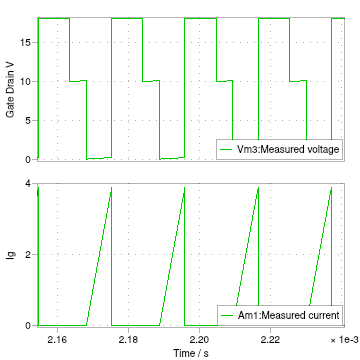

Inductor current: The inductor current charges linearly when the switch is closed up to about 3.87 Amps, at which point, the peak current is reached and the switch opens, then discharging the inductor. Becuase we are in discontinuous conduction mode, there is a period of time where the inductor is fully discharged before the switch closes again.

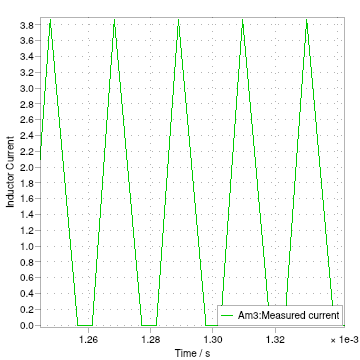

Output current: The output current oscillates around 1.5A in periodic steady state (reached after about 2 ms), which can be derived from Ohm's law; $8V / 5.333\Omega$, with a small ripple of about 20mA.

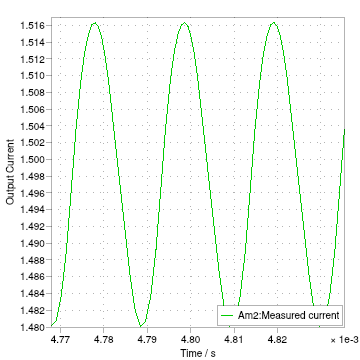

Output Voltage: The output voltage oscillates around 8V in periodic steady state (reached after about 2 ms), with a small ripple of about 10mV.

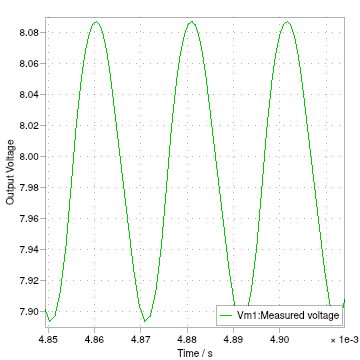

### Q10

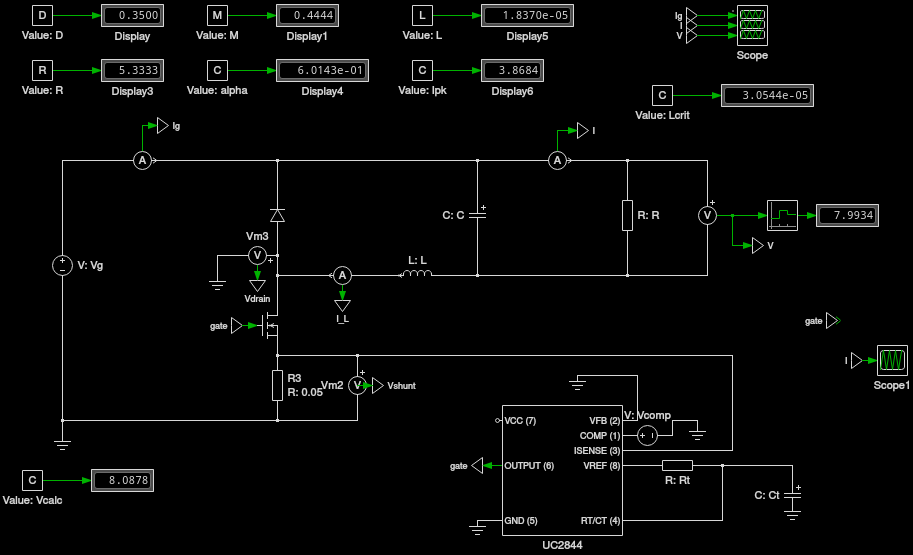

```matlab
Rt = 7.87e3;
Ct = 2.2e-9;
fs_calc = 1.72 / (Rt * Ct * 2); % per UC 2844 Datasheet

Ts=2.0617e-5; % measured in scope
fs=1/Ts;

C=60e-6;
D=0.35;

Vg=18;
V=8;
M=V/Vg;
P=12;

R=V^2/P;

Lcrit = (1-M) * R * (Ts/2);

if (M > D) % DCM
	alpha = (D / M) ^ 2;
else % CCM
	alpha = 1; % or anything above it
endif

%L = alpha * Lcrit;
L = 18.37e-6;
alpha = L/Lcrit
K = (2/Ts) * (L/R);

if (L < Lcrit) % DCM
	Ipk = (V/R) * (2/sqrt(alpha));
	Vcalc = (roots([K, D^2, -(D^2)]) * Vg)(2);
else % CCM
	Ipk = (V/R) * (1 + 1/alpha)
endif

Vcomp = (3/20) * (Ipk + 26/3)
```

### Q11

I am using Unknown Inductor #9.

### Q12

Using two methods, I have calculated the mystery inductance to be about 10.48 uH.

### Q13

Method 1: Using the equation for voltage over an inductor: $V = \frac{dI}{dt} * L$, and plugging in values found empirically for voltage and current from the plot below ($V = 12.6V$ and $\frac{dI}{dt} = 1201500$) yielded an inductance of $10.487 \mu H$

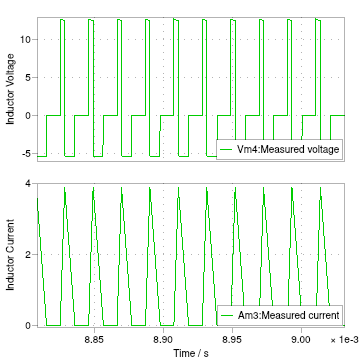

Method 2: Alternatively, I also used the equation for peak current in discontinuous conduction mdoe, $i_{pk} = \frac{2}{\sqrt{\alpha}} \frac{V}{R}$, then rearranged to solve for $\alpha$ like so - $\alpha = (\frac{2V}{R*I_{pk}})^2$, and lastly solving for inducance through

$$
\alpha {L_{crit}} = L
$$
$$
\alpha ((1-M)*R*\frac{Ts}{2}) = L
$$

Plugging these numbers in as $R=5.33\Omega$, $Ts = 2.0617e-5$ (determined empirically), $M=\frac{5.375}{18}$ (determined empirically), and $I_{pk} = 3.868$ (determined empirically, but is set to this by our Vcomp) yieled an inductance of $L=10.472 \mu H$.